In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pydot

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

Using TensorFlow backend.


In [3]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
train_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
                'dataset/handwriting_shape/train/',
target_size=(24, 24),
batch_size = 3,
class_mode='categorical')

Found 45 images belonging to 3 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
'dataset/handwriting_shape/test/',
target_size = (24, 24),
batch_size=3,
class_mode='categorical')

Found 15 images belonging to 3 classes.


In [6]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [7]:
train_generator.filenames[0]

'circle\\circle001.png'

In [8]:
test_generator.labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', input_shape=[24, 24, 3]),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
__________________________________________________

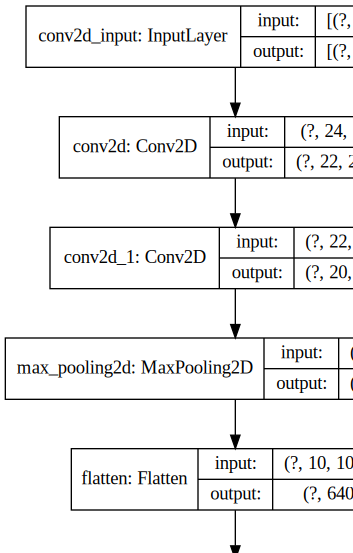

In [10]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

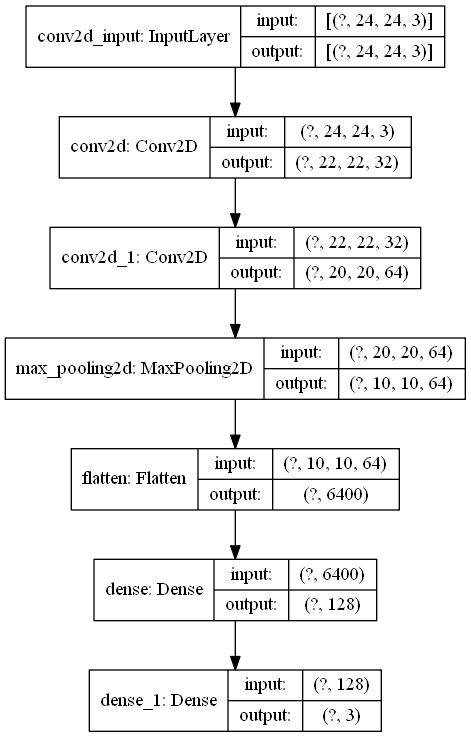

In [11]:
plot_model(model, show_shapes=True)   

In [12]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adam(),
             metrics = [keras.metrics.categorical_accuracy])


## 모델 학습시키기
1. 첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 train_generator으로 지정.
2. steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정. 총 45개의 훈련 샘플이 있고 배치사이즈가 3이므로 15 스텝으로 지정.
3. epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정. 50번을 반복적으로 학습.
4. validation_data : 검증데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 validation_generator으로 지정.
5. validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정. 홍 15개의 검증 샘플이 있고 배치사이즈가 3이므로 5 스텝으로 지정.

In [13]:
model.fit_generator(train_generator, steps_per_epoch = 15, epochs=50, validation_data = test_generator, validation_steps=5)

Epoch 1/50
15/15 [==============================] - 0s 33ms/step - loss: 0.9928 - categorical_accuracy: 0.6222 - val_loss: 0.5190 - val_categorical_accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - 0s 32ms/step - loss: 0.2286 - categorical_accuracy: 0.9556 - val_loss: 0.0849 - val_categorical_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 31ms/step - loss: 0.0316 - categorical_accuracy: 1.0000 - val_loss: 0.1944 - val_categorical_accuracy: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0122 - categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_categorical_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 31ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.0284 - val_categorical_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 30ms/step - loss: 4.7532e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0305 - val_categorical_accuracy: 1.0000
Epoch 

In [14]:
scores = model.evaluate_generator(test_generator, steps=5)

In [15]:
scores

[0.01236713865891943, 1.0]

In [16]:
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter = {'float' : lambda x: '{0:0.3f}'.format(x)})
print(test_generator.class_indices)
print(output)

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.999 0.000 0.001]
 [1.000 0.000 0.000]
 [0.000 0.001 0.999]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.104 0.832 0.064]]


In [17]:
for i in range(len(test_generator.labels)):
    print(test_generator.filenames[i], test_generator.labels[i], np.argmax(output[i]))

circle\circle016.png 0 0
circle\circle017.png 0 1
circle\circle018.png 0 2
circle\circle019.png 0 0
circle\circle020.png 0 2
rectangle\rectangle016.png 1 0
rectangle\rectangle017.png 1 1
rectangle\rectangle018.png 1 2
rectangle\rectangle019.png 1 2
rectangle\rectangle020.png 1 0
triangle\triangle016.png 2 0
triangle\triangle017.png 2 2
triangle\triangle018.png 2 1
triangle\triangle019.png 2 1
triangle\triangle020.png 2 1
